In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt
from scipy.integrate import odeint
import numpy as np


In [6]:
# Définitiond du système de l'ennoncé est c'est aussi f(N(t))
def mutation(t, N, r=(1,1), K=(1,2)):
    return [r[0]*N[0] * (1 - (N[0]+N[1])/K[0]), r[1]*N[1] * (1 - (N[0]+N[1])/K[1])]

Les points d'équlibre calculé théoriquement sont (0,0), (0, K2) et (K1, 0).  
Donc On affiche la dynamique de phase sur (xmin = -0.5, xmax = 1.5) et (ymin = -0.5, ymax = 3)  
de sorte à voir tous les points d'équilibre (car K1 = 1 et K2 = 2)




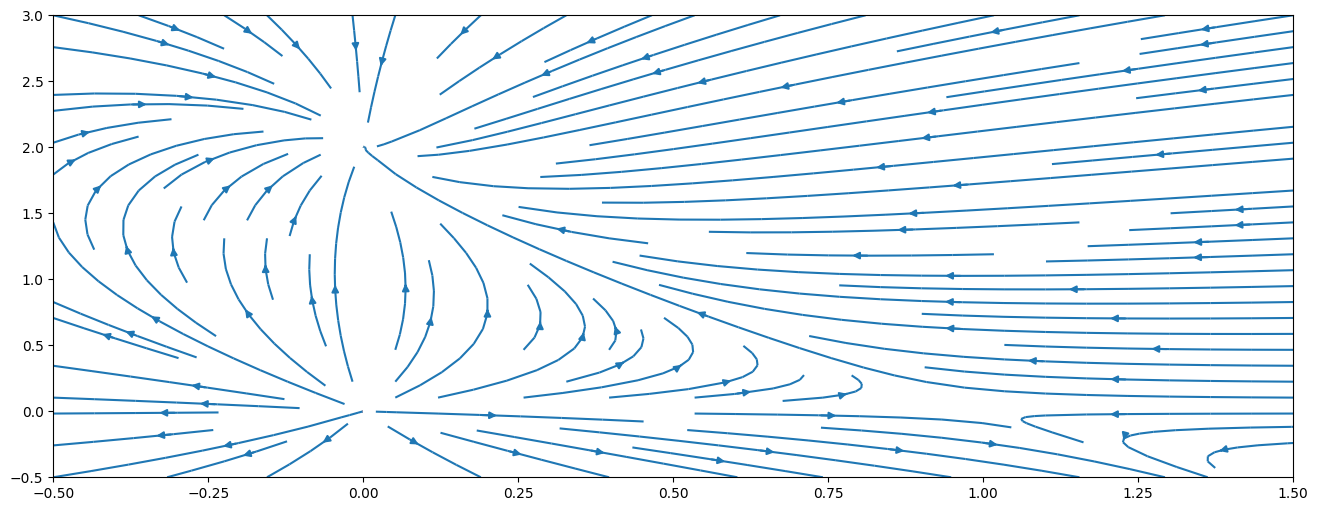

In [36]:
xmin, xmax = -0.5, 1.5
ymin, ymax = -0.5, 3

# X et Y comme vecteurs
x = np.linspace(xmin, xmax, 1000)
y = np.linspace(ymin, ymax, 1000)

# X et Y comme matrices
X, Y = np.meshgrid(x, y)
stream = mutation(0, [X, Y])

plt.figure(1,figsize=(16,6))

phase = plt.streamplot(X, Y, stream[0], stream[1])


Les états d'équlibres sont d'après les observation en (0,0), (0,2) et (1,0) ce qui correspond bien a (0,0), (0,K2) et (K1, 0).

J'affiche ici le même diagramme de phase mais avec des points bleu sur les points d'équilibres 

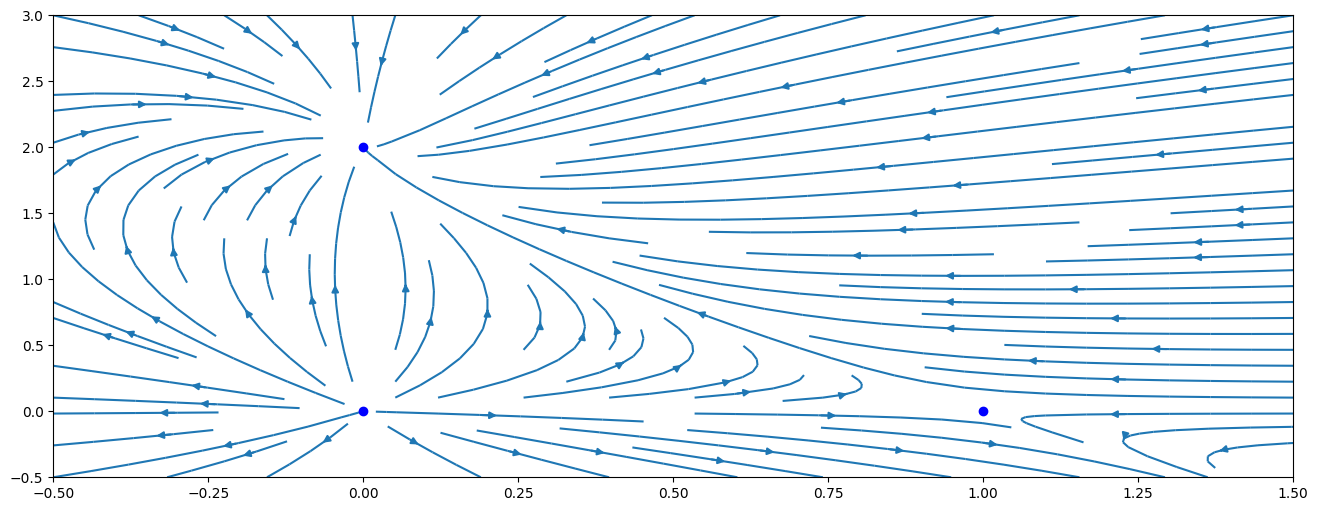

In [ ]:
xmin, xmax = -0.5, 1.5
ymin, ymax = -0.5, 3

# X et Y comme vecteurs
x = np.linspace(xmin, xmax, 1000)
y = np.linspace(ymin, ymax, 1000)

# X et Y comme matrices
X, Y = np.meshgrid(x, y)
stream = mutation(0, [X, Y])

plt.figure(1,figsize=(16,6))
phase = plt.streamplot(X, Y, stream[0], stream[1])
plt.plot([0,0,1],[0,2,0], 'bo')



Dans la partie théorique la Jacobienne de la fonction du système differentiel donne :
\begin{equation*}
\mathcal{J}(f)(N_1,N_2) = \begin{pmatrix} r_1(1-\frac{2N_1 + N_2}{K_1}) & -r_1\frac{N_1}{K_1} \\\\  -r_2\frac{N_2}{K_2} & r_2(1-\frac{2N_2 + N_1}{K_2}) \end{pmatrix}
\end{equation*}  
On implémente cette fonction :


In [48]:
#jacobienne du syteme au point (N1, N2)
def Jacob_N(N1, N2, r=(1,1), K=(1,2)):
    return [[ r[0]*( 1-(2*N1+N2)/K[0] ), -r[0]*N1/K[0] ], [ -r[1]*N2/K[1], r[1]*( 1-(2*N2+N1)/K[1] ) ]]


Cas K=(1,2) :


In [ ]:
K = (1,2)
p1 = np.linalg.eigvals(Jacob_N(0,0))
p2 = np.linalg.eigvals(Jacob_N(0,K[1]))
p3 = np.linalg.eigvals(Jacob_N(K[0],0))

print("Pour le point (0,0) on a : lambda =" ,p1)
print("Pour le point (0,K2=2) on a : lambda =" ,p2)
print("Pour le point (K1=1,0) on a : lambda =" ,p3)



Pour le point (0,0) on a : lambda = [1. 1.]
Pour le point (0,K2=2) on a : lambda = [-1. -1.]
Pour le point (K1=1,0) on a : lambda = [-1.   0.5]


Ici les les points (0,0) et (K1, 0) sont donc instable (car au moins une des deux valeurs propres est positives)
Et pour (0,K2) les deux valeurs propres étant négatives on a un point stable.

On le voit dans le graphique tracé précedement car seul le point (0,2) est attractif et les deux autres sont répulsifs.

Cas K = (2,1)


Pour le point (0,0) on a : lambda = [1. 1.]
Pour le point (0,K2=1) on a : lambda = [-1.   0.5]
Pour le point (K1=2,0) on a : lambda = [-1. -1.]


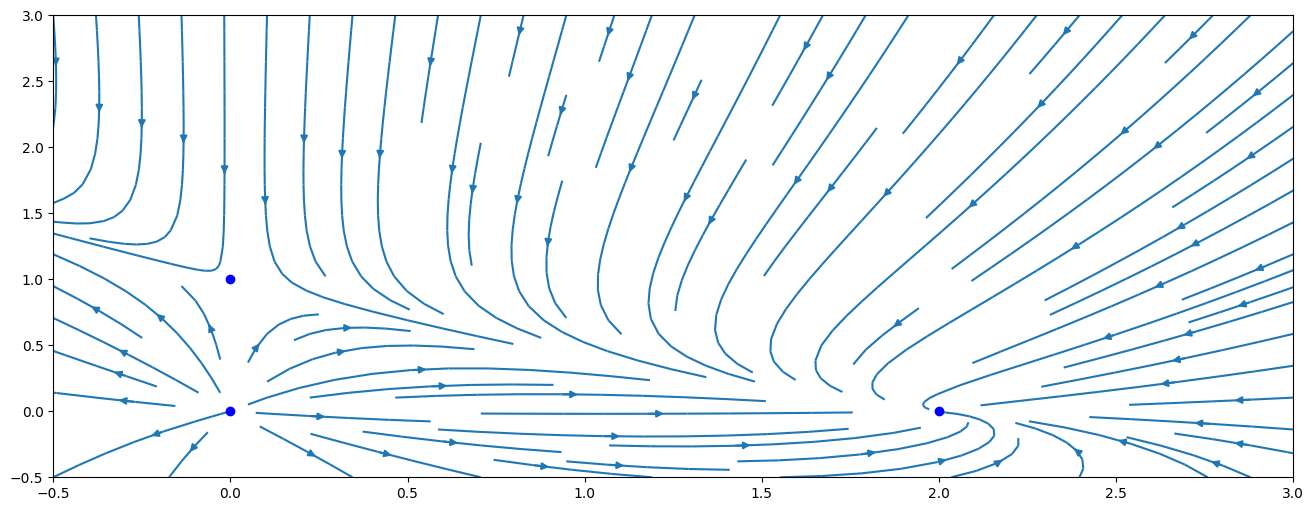

In [66]:

# calcul des valeurs propres pour K = (2,1)
K = (2,1)
p1 = np.linalg.eigvals(Jacob_N(0,0, K=K))
p2 = np.linalg.eigvals(Jacob_N(0,K[1], K=K))
p3 = np.linalg.eigvals(Jacob_N(K[0],0, K=K))

print("Pour le point (0,0) on a : lambda =" ,p1)
print("Pour le point (0,K2=1) on a : lambda =" ,p2)
print("Pour le point (K1=2,0) on a : lambda =" ,p3)


# Affichage d'un autre diagramme de phase pour K = (2,1)
xmin, xmax = -0.5, 3
ymin, ymax = -0.5, 3

# X et Y comme vecteurs
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)

# X et Y comme matrices
X, Y = np.meshgrid(x, y)
stream = mutation(0, [X, Y], K=K)

plt.figure(1,figsize=(16,6))
phase = plt.streamplot(X, Y, stream[0], stream[1])
plt.plot([0,0,2],[0,1,0], 'bo')




Ici les les points (0,0) et (0, K2) sont donc instable (car au moins une des deux valeurs propres est positives)
Et pour (K1,0) les deux valeurs propres étant négatives on a un point stable.

On le voit dans le graphique tracé car seul le point (2,0) est attractif et les deux autres sont répulsifs.

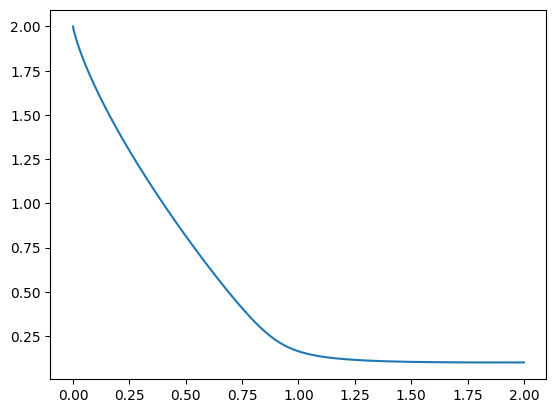

In [87]:
dt = .00001
tmax = 30
nmax = int(tmax/dt)
t = [dt*i for i in range(nmax)]
N = odeint(mutation, [2, 0.1], t, args=((1,1), (1,2)), tfirst='true')

plt.plot(N[:,0], N[:,1])



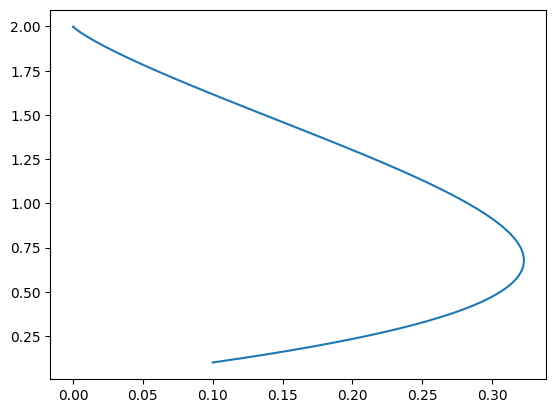

In [88]:
# Pour (0,0)

dt = .00001
tmax = 30
nmax = int(tmax/dt)
t = [dt*i for i in range(nmax)]
N = odeint(mutation, [0.1, 0.1], t, args=((1,1), (1,2)), tfirst='true')

plt.plot(N[:,0], N[:,1])

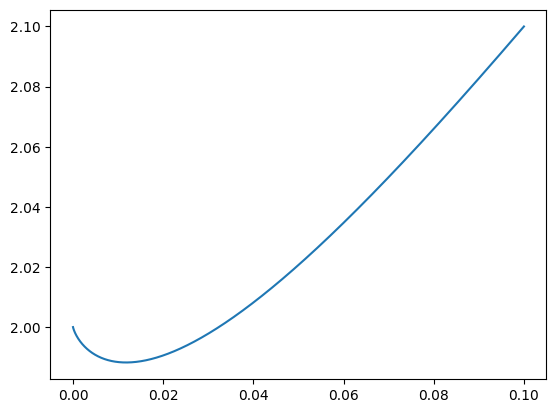

In [ ]:
#Pour (0,K2=2)

dt = .00001
tmax = 30
nmax = int(tmax/dt)
t = [dt*i for i in range(nmax)]
N = odeint(mutation, [0.1, 2.1], t, args=((1,1), (1,2)), tfirst='true')

plt.plot(N[:,0], N[:,1])

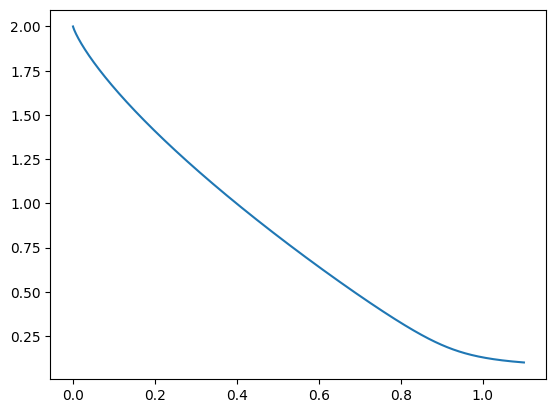

In [90]:
#Pour (K1=1,0)

dt = .00001
tmax = 30
nmax = int(tmax/dt)
t = [dt*i for i in range(nmax)]
N = odeint(mutation, [1.1, 0.1], t, args=((1,1), (1,2)), tfirst='true')

plt.plot(N[:,0], N[:,1])